In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


In [2]:
(training_image, training_label), (test_image, test_label) = datasets.cifar10.load_data()
training_image, test_image = training_image / 255.0, test_image / 255.0



In [3]:
class_names = [
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    
]


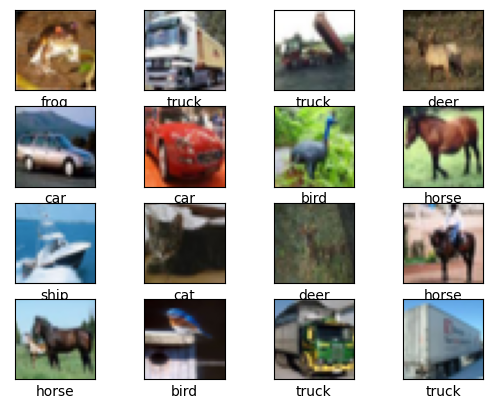

In [4]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_label[i][0]])
plt.show()






In [5]:
traing_image = training_image[:20000]
traing_label = training_label[:20000]
test_image = test_image[:4000]
test_label = test_label[:4000]


In [ ]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))



In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(training_image[:4000], training_label[:4000], epochs=20, validation_data=(test_image, test_label))


In [ ]:
loss, accuracy = cnn_model.evaluate(test_image, test_label)
print(f"Loss: {loss}\nAccuracy: {accuracy}")

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and resize it
from IPython.display import display, Image

# Load the image and resize it
img = cv2.imread(r"C:\Users\home\Downloads\lenstravelier-lMldlSzBe1E-unsplash.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img, (32, 32))

# Make a prediction
prediction = cnn_model.predict(np.array([resized_img]) / 255.0)
index = np.argmax(prediction)
predicted_class = class_names[index]

# Display the image with title and predicted label
plt.figure(figsize=(6, 6))
plt.imshow(resized_img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Display the image without resizing and without blurring
# display(Image(data=resized_img))

